In [1]:
import pandas as pd
import numpy as np

In [164]:
df = pd.read_csv('./crime.csv', encoding='ISO-8859-1')
df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,2017421909,2017421909299900,2999,0,criminal-mischief-other,public-disorder,6/25/2017 8:40:00 PM,NaN,6/27/2017 7:01:00 PM,2920 W 32ND AVE,3133773.0,1702660.0,-105.024167,39.761646,1,113,highland,1,0,1
1,2017342682,2017342682299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:00:00 PM,NaN,5/26/2017 11:04:00 PM,13400 E ALBROOK DR,3185904.0,1709037.0,-104.838576,39.778256,5,521,montbello,1,0,1
2,2017421829,2017421829299900,2999,0,criminal-mischief-other,public-disorder,6/27/2017 4:40:00 PM,NaN,6/27/2017 5:50:00 PM,1600 BLOCK 16TH ST,3140436.0,1699005.0,-105.000538,39.751514,6,612,union-station,1,0,1
3,2017342681,2017342681299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:01:00 PM,NaN,5/26/2017 10:21:00 PM,2200 BLOCK MARKET ST,3143338.0,1700561.0,-104.990186,39.755741,6,612,five-points,1,0,1
4,2017448789,2017448789299900,2999,0,criminal-mischief-other,public-disorder,7/7/2017 9:48:00 PM,NaN,7/7/2017 9:48:00 PM,1733 N GROVE ST,3132994.0,1696487.0,-105.027052,39.744711,1,121,west-colfax,1,0,1


In [165]:
df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])
df.set_index('FIRST_OCCURRENCE_DATE', inplace=True)
df.sort_index(inplace=True)

In [144]:
df.index

DatetimeIndex(['2017-01-02 00:00:00', '2017-01-02 00:00:00',
               '2017-01-02 00:19:00', '2017-01-02 00:36:00',
               '2017-01-02 01:00:00', '2017-01-02 01:00:00',
               '2017-01-02 01:15:00', '2017-01-02 01:18:00',
               '2017-01-02 02:12:00', '2017-01-02 02:22:00',
               ...
               '2022-09-01 17:45:00', '2022-09-01 18:20:00',
               '2022-09-01 18:52:00', '2022-09-01 19:00:00',
               '2022-09-01 20:13:00', '2022-09-01 20:35:00',
               '2022-09-01 20:51:00', '2022-09-01 21:15:00',
               '2022-09-01 21:20:00', '2022-09-01 21:20:00'],
              dtype='datetime64[ns]', name='FIRST_OCCURRENCE_DATE', length=391951, freq=None)

In [145]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

In [146]:
encoded_col = le.fit_transform(df['OFFENSE_CATEGORY_ID'])
encoded_values = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_values)

{'aggravated-assault': 0, 'all-other-crimes': 1, 'arson': 2, 'auto-theft': 3, 'burglary': 4, 'drug-alcohol': 5, 'larceny': 6, 'murder': 7, 'other-crimes-against-persons': 8, 'public-disorder': 9, 'robbery': 10, 'sexual-assault': 11, 'theft-from-motor-vehicle': 12, 'white-collar-crime': 13}


In [147]:
# Transform the column to numeric
df['OFFENSE_CATEGORY_ID_ENCODED'] = encoded_col
df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT,OFFENSE_CATEGORY_ID_ENCODED
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00,20173683,20173683230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/2/2017 7:40:00 PM,1/2/2017 8:28:00 PM,3755 E BUCHTEL BLVD,3156685.0,1673197.0,-104.943312,39.680406,3,314,university-park,1,0,1,12
2017-01-02 00:00:00,20176000084,20176000084230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,1/2/2017 6:00:00 AM,1/3/2017 10:51:00 AM,1719 W TENNESSEE AVE,3138664.0,1679671.0,-105.007213,39.698465,4,412,athmar-park,1,0,1,12
2017-01-02 00:19:00,20172076,20172076131300,1313,0,assault-simple,other-crimes-against-persons,NaN,1/2/2017 12:19:00 AM,2575 S HOOKER ST,3132546.0,1669880.0,-105.029135,39.671675,4,421,harvey-park,1,0,1,8
2017-01-02 00:36:00,20172096,20172096299901,2999,1,criminal-mischief-mtr-veh,public-disorder,NaN,1/2/2017 2:58:00 AM,2777 W BAYAUD AVE,3134410.0,1685698.0,-105.022218,39.715073,4,411,valverde,1,0,1,9
2017-01-02 01:00:00,20172126,20172126240400,2404,0,theft-of-motor-vehicle,auto-theft,NaN,1/2/2017 1:00:00 AM,N SHERIDAN BLVD / W 10TH AVE,3125651.0,1692222.0,-105.053239,39.733105,1,122,villa-park,1,0,1,3


In [148]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [149]:
df = df[df["DISTRICT_ID"] == '6']
df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT,OFFENSE_CATEGORY_ID_ENCODED
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,
2017-01-02 01:00:00,20173759,20173759230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/2/2017 3:00:00 PM,1/2/2017 8:54:00 PM,1460 LITTLE RAVEN ST,3138745.0,1699884.0,-105.006535,39.753952,6,612,union-station,1,0,1,12
2017-01-02 02:22:00,20174969,20174969220500,2205,0,burglary-business-no-force,burglary,1/2/2017 2:25:00 AM,1/3/2017 10:19:00 AM,1201 16TH ST,3141432.0,1698125.0,-104.997013,39.749083,6,612,union-station,1,0,1,4
2017-01-02 07:20:00,20172830,20172830299900,2999,0,criminal-mischief-other,public-disorder,NaN,1/2/2017 1:38:00 PM,490 W COLFAX AVE,3142418.0,1694739.0,-104.993574,39.739773,6,611,civic-center,1,0,1,9
2017-01-02 09:00:00,20172829,20172829299900,2999,0,criminal-mischief-other,public-disorder,NaN,1/2/2017 2:09:00 PM,490 W COLFAX AVE,3142418.0,1694739.0,-104.993574,39.739773,6,611,civic-center,1,0,1,9
2017-01-02 09:00:00,201727888,201727888250100,2501,0,forgery-checks,white-collar-crime,1/12/2017 3:00:00 PM,1/13/2017 6:11:00 PM,1300 BLK N CORONA ST,3147979.0,1693886.0,-104.973817,39.737344,6,623,capitol-hill,1,0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01 18:52:00,2022451283,2022451283359900,3599,0,drug-pcs-other-drug,drug-alcohol,NaN,9/1/2022 8:08:00 PM,1000 BLK N BROADWAY ST / LINCOLN ST ALLE,0.0,0.0,-115.464063,34.638233,6,623,NaN,1,0,1,5
2022-09-01 20:51:00,2022451459,2022451459739902,7399,2,public-order-crimes-other,all-other-crimes,NaN,9/1/2022 10:26:00 PM,E COLFAX AVE / N BROADWAY ST,3144156.0,1694853.0,-104.987391,39.740059,6,621,civic-center,1,0,1,1
2022-09-01 21:15:00,2022451499,2022451499570700,5707,0,criminal-trespassing,all-other-crimes,NaN,9/1/2022 10:17:00 PM,16TH ST / STOUT CHAMPA ALY,3142425.0,1697075.0,-104.993503,39.746186,6,611,cbd,1,0,1,1


In [150]:
# Filter the data to only include data from Sundays at 12 PM
df.index = pd.to_datetime(df.index)
df = df[(df.index.dayofweek == 6) & (df.index.hour == 12)]
df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT,OFFENSE_CATEGORY_ID_ENCODED
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,
2017-01-08 12:00:00,201715465,201715465131501,1315,1,aggravated-assault-dv,aggravated-assault,NaN,1/8/2017 1:09:00 PM,1434 N CORONA ST,3147972.0,1694512.0,-104.973829,39.739063,6,623,capitol-hill,1,0,1,0
2017-01-08 12:00:00,201742080,201742080220200,2202,0,burglary-residence-by-force,burglary,1/19/2017 9:45:00 PM,1/19/2017 9:45:00 PM,1735 N OGDEN ST,3147584.0,1696363.0,-104.975171,39.744151,6,621,north-capitol-hill,1,0,1,4
2017-01-22 12:10:00,201747730,201747730230300,2303,0,theft-shoplift,larceny,NaN,1/22/2017 12:40:00 PM,1155 E 9TH AVE,3147996.0,1691775.0,-104.973800,39.731549,6,623,capitol-hill,1,0,1,6
2017-01-22 12:20:00,201747745,201747745739902,7399,2,public-order-crimes-other,all-other-crimes,NaN,1/22/2017 1:56:00 PM,200 BLOCK W 14TH AVE,3143237.0,1694132.0,-104.990674,39.738094,6,611,civic-center,1,0,1,1
2017-01-22 12:20:00,201747745,201747745355000,3550,0,drug-poss-paraphernalia,drug-alcohol,NaN,1/22/2017 1:56:00 PM,200 BLOCK W 14TH AVE,3143237.0,1694132.0,-104.990674,39.738094,6,611,civic-center,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-21 12:00:00,2022436702,2022436702230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,8/25/2022 11:00:00 AM,8/25/2022 11:45:00 AM,18TH ST / MARKET ST,3141748.0,1699098.0,-104.995870,39.751749,6,612,union-station,1,0,1,12
2022-08-21 12:00:00,2022433115,2022433115230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,8/23/2022 3:00:00 PM,8/23/2022 4:21:00 PM,1451 24TH ST,3143701.0,1701329.0,-104.988880,39.757844,6,612,five-points,1,0,1,12
2022-08-21 12:02:00,2022429063,2022429063299900,2999,0,criminal-mischief-other,public-disorder,NaN,8/21/2022 12:42:00 PM,216 16TH ST,3143891.0,1695528.0,-104.988320,39.741916,6,611,cbd,1,0,1,9


In [151]:
# Filter the data to only include "OFFENSE_CATEGORY_ID" column
df = df["OFFENSE_CATEGORY_ID_ENCODED"]
df

FIRST_OCCURRENCE_DATE
2017-01-08 12:00:00     0
2017-01-08 12:00:00     4
2017-01-22 12:10:00     6
2017-01-22 12:20:00     1
2017-01-22 12:20:00     5
                       ..
2022-08-21 12:00:00    12
2022-08-21 12:00:00    12
2022-08-21 12:02:00     9
2022-08-28 12:00:00     9
2022-08-28 12:41:00     8
Name: OFFENSE_CATEGORY_ID_ENCODED, Length: 590, dtype: int64

In [152]:
df.index = pd.DatetimeIndex(df.index).to_period('M')

In [153]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [154]:
# Fit an ARIMA model to the data
model = ARIMA(df, order=(2,1,2))
model_fit = model.fit()

In [161]:
# Use the fitted ARIMA model to make a prediction for the next Sunday at 12 PM
yhat = model_fit.forecast()[0]
yhat

6.669153783823315

In [162]:
import matplotlib.pyplot as plt

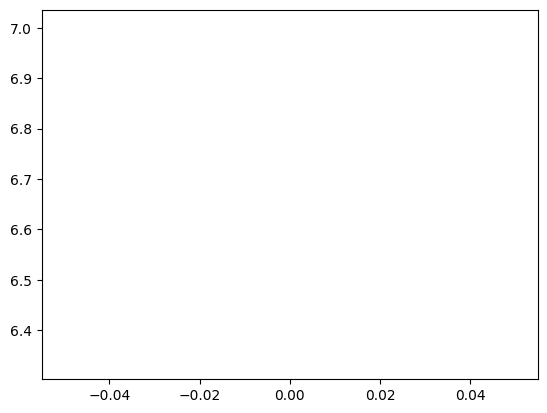

In [163]:
# pd.plotting.register_matplotlib_converters()
# Plot the original data and the prediction
# plt.plot(df)
plt.plot(yhat, color='red')
plt.show()